In [38]:
#Basic libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
warnings.filterwarnings('ignore')
import psycopg2
from sqlalchemy import create_engine
import matplotlib.pyplot as plt


In [39]:
# PostgreSQL connection parameters
host = "localhost"
user = "postgres"
password = "mariam21"
database = "telecom_db"
table_name = "xdr_data"

In [40]:
# Construct the connection string
conn_str = f"postgresql+psycopg2://{user}:{password}@{host}/{database}"

# Create a database engine
engine = create_engine(conn_str)

# Example query to retrieve data into a pandas DataFrame
query = f"SELECT * FROM {table_name};"
df = pd.read_sql(query, engine)

In [41]:
print('number of rows', df.shape[0])
print('number of columns', df.shape[1])

number of rows 150001
number of columns 55


In [42]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [43]:
df.tail()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0
150000,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,None,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,NaN,NaN


In [44]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [46]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [47]:
df.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [48]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
# visualise the numerical variables
df[numerical_features].sample(5)

Number of numerical variables:  50


,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
98858,1.304243e+19,522.0,235.0,25239.0,2.082014e+14,3.361028e+10,3.578211e+13,49.0,33.0,28535.0,...,4535401.0,13593775.0,17987593.0,6386518.0,299678297.0,14815926.0,533535748.0,7034183.0,44831683.0,330492689.0
108664,7.349883e+18,832.0,266.0,139860.0,2.082017e+14,3.363155e+10,3.530421e+13,70.0,2.0,45.0,...,22330553.0,10318028.0,19755517.0,406878.0,642230298.0,335967.0,666250541.0,577718.0,12658591.0,689365209.0
64654,7.349883e+18,384.0,588.0,127719.0,2.082015e+14,3.365081e+10,3.548891e+13,NaN,NaN,49.0,...,3690117.0,8741241.0,8723867.0,12540600.0,683938388.0,10407676.0,515885110.0,10236670.0,43182178.0,710779844.0
47040,1.311448e+19,212.0,291.0,89270.0,2.082009e+14,3.361475e+10,3.594781e+13,77.0,4.0,52.0,...,3903854.0,15519493.0,11507426.0,13070279.0,740445839.0,10285268.0,615088218.0,15449911.0,58411718.0,765524519.0
140948,1.311448e+19,516.0,10.0,109962.0,2.082010e+14,3.363532e+10,8.650370e+13,45.0,1.0,20.0,...,22230608.0,7925578.0,3178413.0,11556891.0,842295600.0,9613372.0,414251511.0,9237595.0,39293503.0,878342056.0


# Check Missing values

In [49]:
df.isnull().any()

Bearer Id                                    True
Start                                        True
Start ms                                     True
End                                          True
End ms                                       True
Dur. (ms)                                    True
IMSI                                         True
MSISDN/Number                                True
IMEI                                         True
Last Location Name                           True
Avg RTT DL (ms)                              True
Avg RTT UL (ms)                              True
Avg Bearer TP DL (kbps)                      True
Avg Bearer TP UL (kbps)                      True
TCP DL Retrans. Vol (Bytes)                  True
TCP UL Retrans. Vol (Bytes)                  True
DL TP < 50 Kbps (%)                          True
50 Kbps < DL TP < 250 Kbps (%)               True
250 Kbps < DL TP < 1 Mbps (%)                True
DL TP > 1 Mbps (%)                           True


In [50]:
df.isnull().sum() 

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [51]:
# we should imput the missing avlue
# numerical features imput by mean and categorical features are imputed by mode

In [52]:
# Enumerate Function in Python to check unickness of  all columns
for l, k in enumerate(df.columns):
      print(k, ' == >> ',df[k].unique())

Bearer Id  == >>  [1.31144835e+19 1.31144835e+19 1.31144835e+19 ... 7.27782567e+18
 7.34988326e+18 1.31144836e+19]
Start  == >>  ['4/4/2019 12:01' '4/9/2019 13:04' '4/9/2019 17:42' ... '4/29/2019 7:27'
 '4/29/2019 7:28' None]
Start ms  == >>  [770. 235.   1. ... 431.  95.  nan]
End  == >>  ['4/25/2019 14:35' '4/25/2019 8:15' '4/25/2019 11:58' ...
 '4/30/2019 23:18' '4/30/2019 22:32' None]
End ms  == >>  [662. 606. 652. ...  91. 499.  nan]
Dur. (ms)  == >>  [1823652. 1365104. 1361762. ...   81230.   98249.      nan]
IMSI  == >>  [2.08201448e+14 2.08201909e+14 2.08200314e+14 ... 2.08202201e+14
 2.08201711e+14 2.08202101e+14]
MSISDN/Number  == >>  [3.36649622e+10 3.36818544e+10 3.37606271e+10 ... 3.36506887e+10
 3.36218901e+10 3.36196221e+10]
IMEI  == >>  [3.55212095e+13 3.57940090e+13 3.52815104e+13 ... 3.54831095e+13
 3.57212099e+13 8.61862040e+13]
Last Location Name  == >>  ['9.16456699548519E+015' 'L77566A' 'D42335A' ... 'D20434A' 'T51102A'
 'L88342B']
Avg RTT DL (ms)  == >>  [   42. 

In [53]:
# Loop through each column
for column_mean in ['Bearer Id', 'Start ms',  'End ms', 'Dur. (ms)',
       'MSISDN/Number', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B','IMEI','IMSI',
       'Nb of sec with 6250B < Vol UL < 37500B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)',
       'Total UL (Bytes)', 'Total DL (Bytes)']:
    try:
        # Convert the column to numeric (ignore errors)
        df[column_mean] = pd.to_numeric(df[column_mean], errors='coerce')
        # Calculate the mean, ignoring NaN values
        mean_value = df[column_mean].mean(skipna=True)
        # Impute missing values with the mean
        df[column_mean].fillna(mean_value, inplace=True)
    except Exception as e:
        print(f"Error processing column '{column_mean}': {e}")


In [54]:
df.isnull().sum()

Bearer Id                                       0
Start                                           1
Start ms                                        0
End                                             1
End ms                                          0
Dur. (ms)                                       0
IMSI                                            0
MSISDN/Number                                   0
IMEI                                            0
Last Location Name                           1153
Avg RTT DL (ms)                                 0
Avg RTT UL (ms)                                 0
Avg Bearer TP DL (kbps)                         0
Avg Bearer TP UL (kbps)                         0
TCP DL Retrans. Vol (Bytes)                     0
TCP UL Retrans. Vol (Bytes)                     0
DL TP < 50 Kbps (%)                             0
50 Kbps < DL TP < 250 Kbps (%)                  0
250 Kbps < DL TP < 1 Mbps (%)                   0
DL TP > 1 Mbps (%)                              0


In [55]:
df['Start'].unique()

array(['4/4/2019 12:01', '4/9/2019 13:04', '4/9/2019 17:42', ...,
       '4/29/2019 7:27', '4/29/2019 7:28', None], dtype=object)

In [56]:
df['End'].unique()

array(['4/25/2019 14:35', '4/25/2019 8:15', '4/25/2019 11:58', ...,
       '4/30/2019 23:18', '4/30/2019 22:32', None], dtype=object)

In [57]:
df['Handset Type'].unique()

array(['Samsung Galaxy A5 Sm-A520F', 'Samsung Galaxy J5 (Sm-J530)',
       'Samsung Galaxy A8 (2018)', ..., 'Asustek Asus Zb500Kg',
       'Huawei Mediapad T5 10 Pro',
       'Shenzhen Jeko Co. Blackview Bv5800 Pro'], dtype=object)

In [58]:
df['Last Location Name'].unique()

array(['9.16456699548519E+015', 'L77566A', 'D42335A', ..., 'D20434A',
       'T51102A', 'L88342B'], dtype=object)

In [59]:
df['Handset Manufacturer'].unique()

array(['Samsung', 'undefined', 'Huawei', 'Apple', 'Zte',
       'TP-Link Technologies Co Ltd', 'Ertebat Hamrah Guya Arvand',
       'Wiko Global Sasu', None, 'TCL Communication Ltd',
       'Oneplus Technology (Shenzhen) Co Ltd', 'Zebra Technologies Corp.',
       'Nokia', 'Wiko', 'Tcl Communication Ltd', 'ZTE', 'Lenovo',
       'Asustek', 'Xiaomi Communications Co Ltd', 'Rim', 'Hmd Global Oy',
       'Sony Mobile Communications AB', 'D-Link Corporation', 'Wct',
       'Dn Electronics', 'Sony Mobile Communications Ab', 'Netgear Inc',
       'Neel Enterprise', 'Teletalk Pvt Ltd', 'DDM Brands LLC',
       'Tp-Link Technologies Co Ltd', 'Sierra Wireless', 'Google Inc',
       'Shenzhen Chainway Information Technology Co Ltd',
       'Microsoft Mobile Oy', 'Htc', 'Crosscall',
       'Shenzhen Kdi Communication Co Ltd',
       'Simcom Wireless Solutions Co Ltd',
       'Qingdao Hisense Communications Co Ltd', 'Lg', 'Archos Sa',
       'Hewlett-Packard', 'Spa Condor Electronics',
       'Son

In [60]:
# Loop through each column
for column in ['Start', 'End', 'Last Location Name', 'Handset Type', 'Handset Manufacturer']:
    # Calculate the mode
    mode_value = df[column].mode()[0]
    # Impute missing values with the mode
    df[column].fillna(mode_value, inplace=True)

In [61]:
df['Handset Manufacturer'].isnull().sum()

0

In [62]:
# After Properlly handlling the missing values we should check the the missing values
df.isnull().sum()

Bearer Id                                       0
Start                                           0
Start ms                                        0
End                                             0
End ms                                          0
Dur. (ms)                                       0
IMSI                                            0
MSISDN/Number                                   0
IMEI                                            0
Last Location Name                              0
Avg RTT DL (ms)                                 0
Avg RTT UL (ms)                                 0
Avg Bearer TP DL (kbps)                         0
Avg Bearer TP UL (kbps)                         0
TCP DL Retrans. Vol (Bytes)                     0
TCP UL Retrans. Vol (Bytes)                     0
DL TP < 50 Kbps (%)                             0
50 Kbps < DL TP < 250 Kbps (%)                  0
250 Kbps < DL TP < 1 Mbps (%)                   0
DL TP > 1 Mbps (%)                              0


In [63]:
 #after this we should convert all feature types into numeric datatypes for easy of machinelearning 
"""converting features to numeric types is a common preprocessing step to ensure 
compatibility with machine learning algorithms and to leverage the efficiency and 
capabilities of numerical representations"""

'converting features to numeric types is a common preprocessing step to ensure \ncompatibility with machine learning algorithms and to leverage the efficiency and \ncapabilities of numerical representations'

In [64]:
# Enumerate Function in Python to check unickness of  all columns
for l, k in enumerate(df.columns):
      print(k, ' == >> ',df[k].unique())

Bearer Id  == >>  [1.31144835e+19 1.31144835e+19 1.31144835e+19 ... 7.27782567e+18
 7.34988326e+18 1.31144836e+19]
Start  == >>  ['4/4/2019 12:01' '4/9/2019 13:04' '4/9/2019 17:42' ... '4/29/2019 7:26'
 '4/29/2019 7:27' '4/29/2019 7:28']
Start ms  == >>  [770.     235.       1.     ... 431.      95.     499.1882]
End  == >>  ['4/25/2019 14:35' '4/25/2019 8:15' '4/25/2019 11:58' ...
 '4/30/2019 23:41' '4/30/2019 23:18' '4/30/2019 22:32']
End ms  == >>  [662.      606.      652.      ...  91.      499.      498.80088]
Dur. (ms)  == >>  [1823652.         1365104.         1361762.         ...   81230.
   98249.          104608.56034667]
IMSI  == >>  [2.08201448e+14 2.08201909e+14 2.08200314e+14 ... 2.08202201e+14
 2.08201711e+14 2.08202101e+14]
MSISDN/Number  == >>  [3.36649622e+10 3.36818544e+10 3.37606271e+10 ... 3.36506887e+10
 3.36218901e+10 3.36196221e+10]
IMEI  == >>  [3.55212095e+13 3.57940090e+13 3.52815104e+13 ... 3.54831095e+13
 3.57212099e+13 8.61862040e+13]
Last Location Name  

In [166]:
for i in df.columns:
    df[i] = pd.to_numeric(df[i],errors= 'coerce')

In [65]:
df[x] = df[x].astype("Int64")

In [66]:
df.dtypes
for x in df:
    if df[x].dtypes == "float":
        df[x] = df[x].astype("int64")


In [67]:
df.dtypes

Bearer Id                                    int64
Start                                       object
Start ms                                     int64
End                                         object
End ms                                       int64
Dur. (ms)                                    int64
IMSI                                         int64
MSISDN/Number                                int64
IMEI                                         int64
Last Location Name                          object
Avg RTT DL (ms)                              int64
Avg RTT UL (ms)                              int64
Avg Bearer TP DL (kbps)                      int64
Avg Bearer TP UL (kbps)                      int64
TCP DL Retrans. Vol (Bytes)                  int64
TCP UL Retrans. Vol (Bytes)                  int64
DL TP < 50 Kbps (%)                          int64
50 Kbps < DL TP < 250 Kbps (%)               int64
250 Kbps < DL TP < 1 Mbps (%)                int64
DL TP > 1 Mbps (%)             

#Check and remove redundancy

In [68]:
df.duplicated().sum()

0

In [69]:
df.duplicated().sum()

0

In [70]:
df.nunique()

Bearer Id                                    73542
Start                                         9997
Start ms                                      1000
End                                           6403
End ms                                        1000
Dur. (ms)                                    89525
IMSI                                        107266
MSISDN/Number                               106857
IMEI                                        107271
Last Location Name                           45547
Avg RTT DL (ms)                               2130
Avg RTT UL (ms)                                722
Avg Bearer TP DL (kbps)                      41754
Avg Bearer TP UL (kbps)                      14528
TCP DL Retrans. Vol (Bytes)                  54400
TCP UL Retrans. Vol (Bytes)                  35121
DL TP < 50 Kbps (%)                            100
50 Kbps < DL TP < 250 Kbps (%)                  84
250 Kbps < DL TP < 1 Mbps (%)                   73
DL TP > 1 Mbps (%)             

In [71]:
#Explaratory Data Analisis 
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,-9223372036854775808,4/4/2019 12:01,770,4/25/2019 14:35,662,1823652,208201448079117,33664962239,35521209507511,9.16456699548519E+015,...,15854611,2501332,8198936,9656251,278082303,14344150,171744450,8814393,36749741,308879636
1,-9223372036854775808,4/9/2019 13:04,235,4/25/2019 8:15,606,1365104,208201909211140,33681854413,35794009006359,L77566A,...,20247395,19111729,18338413,17227132,608750074,1170709,526904238,15055145,53800391,653384965
2,-9223372036854775808,4/9/2019 17:42,1,4/25/2019 11:58,652,1361762,208200314458056,33760627129,35281510359387,D42335A,...,19725661,14699576,17587794,6163408,229584621,395630,410692588,4215763,27883638,279807335
3,-9223372036854775808,4/10/2019 0:31,486,4/25/2019 7:36,171,1321509,208201402342131,33750343200,35356610164913,T21824A,...,21388122,15146643,13994646,1097942,799538153,10849722,749039933,12797283,43324218,846028530
4,-9223372036854775808,4/12/2019 20:10,565,4/25/2019 10:40,954,1089009,208201401415120,33699795932,35407009745539,D88865A,...,15259380,18962873,17124581,415218,527707248,3529801,550709500,13910322,38542814,569138589


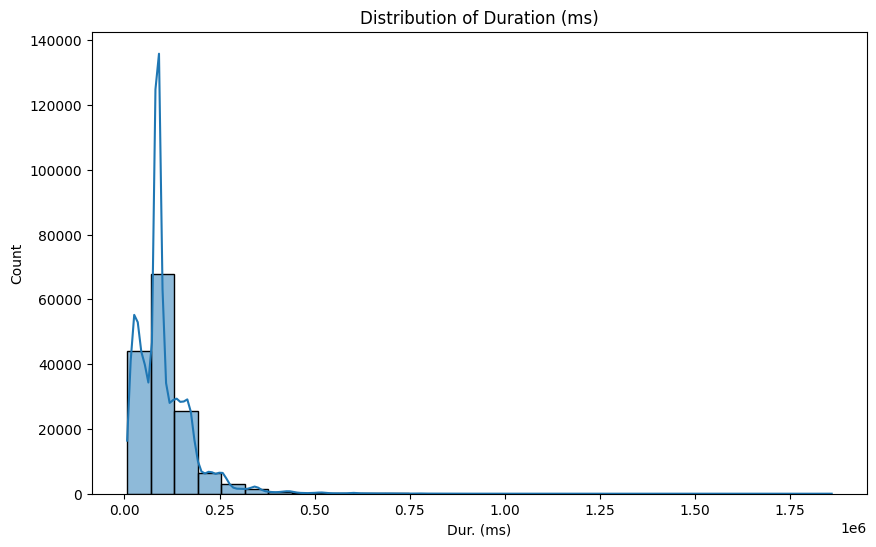

In [72]:

import seaborn as sns
# Example for 'Dur. (ms)'
plt.figure(figsize=(10, 6))
sns.histplot(df['Dur. (ms)'], bins=30, kde=True)
plt.title('Distribution of Duration (ms)')
plt.show()


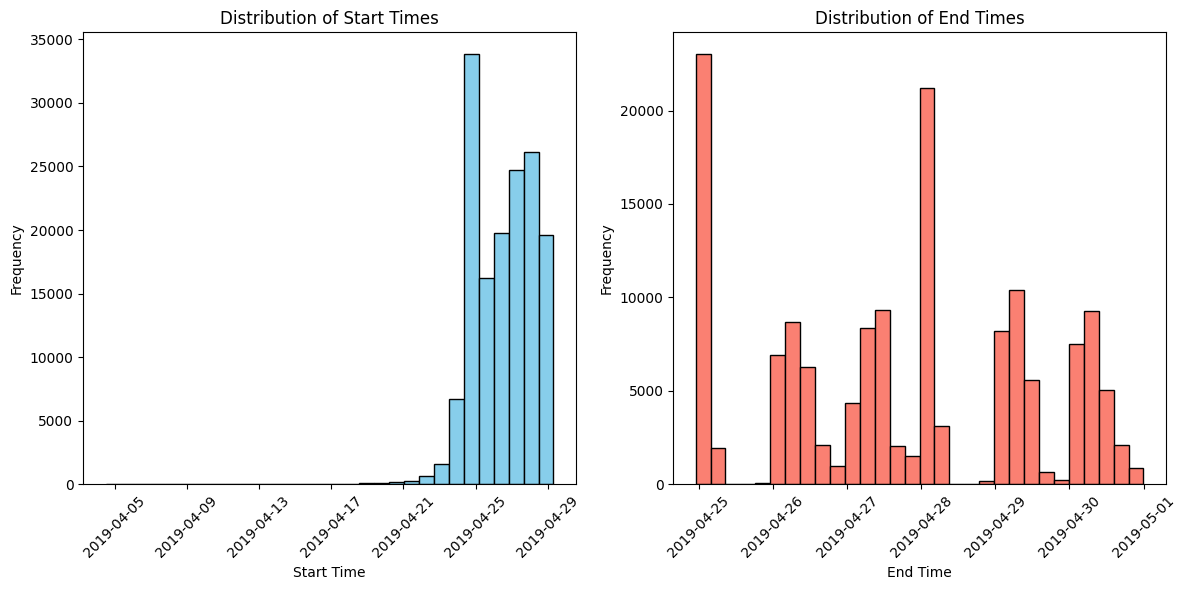

In [73]:

# Convert 'Start' and 'End' to datetime
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

# Plot histograms for 'Start' and 'End'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Start'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Start Times')
plt.xlabel('Start Time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.hist(df['End'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of End Times')
plt.xlabel('End Time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [77]:
# Detecting the presence of outliers 

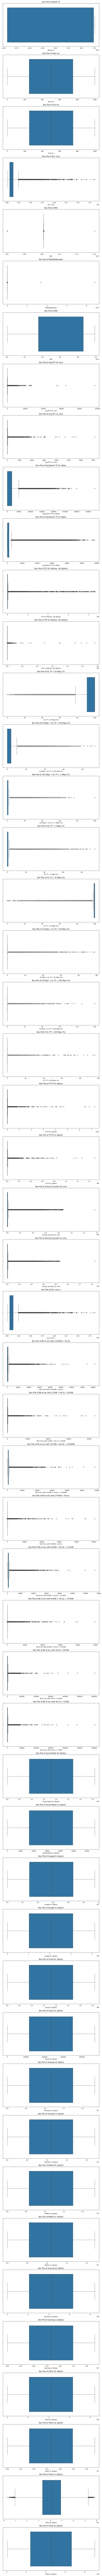

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'

# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Set up subplots
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(10, 5 * len(numeric_columns)))

# Loop through numeric columns and create box plots
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()


In [89]:
# full User Overview analysis

import streamlit as st
# Function to identify the top N handsets
def top_handsets(n):
    top_handsets_df = df['Handset Type'].value_counts().head(n)
    return top_handsets_df

# Function to identify the top N handset manufacturers
def top_manufacturers(n):
    top_manufacturers_df = df['Handset Manufacturer'].value_counts().head(n)
    return top_manufacturers_df

# Function to identify the top N handsets for each manufacturer
def top_handsets_per_manufacturer(manufacturer, n):
    manufacturer_df = df[df['Handset Manufacturer'] == manufacturer]
    top_handsets_df = manufacturer_df['Handset Type'].value_counts().head(n)
    return top_handsets_df

# Streamlit app
def main():
    st.title("Telecom User Overview Analysis")

    # Sidebar with options
    st.sidebar.header("Options")
    analysis_option = st.sidebar.selectbox("Select Analysis", ["Top Handsets", "Top Manufacturers", "Top Handsets per Manufacturer"])

    # Display the analysis based on the selected option
    if analysis_option == "Top Handsets":
        st.header("Top 10 Handsets")
        top_10_handsets = top_handsets(10)
        st.bar_chart(top_10_handsets)

    elif analysis_option == "Top Manufacturers":
        st.header("Top 3 Handset Manufacturers")
        top_3_manufacturers = top_manufacturers(3)
        st.bar_chart(top_3_manufacturers)

    elif analysis_option == "Top Handsets per Manufacturer":
        st.header("Top 5 Handsets per Top 3 Manufacturers")
        # Select top 3 manufacturers
        top_3_manufacturers = top_manufacturers(3)
        for manufacturer in top_3_manufacturers.index:
            st.subheader(f"Top 5 Handsets for {manufacturer}")
            top_5_handsets_per_manufacturer = top_handsets_per_manufacturer(manufacturer, 5)
            st.bar_chart(top_5_handsets_per_manufacturer)

# Run the app 
if __name__ == "__main__":
    main()


2023-12-13 04:52:17.747 
  command:

    streamlit run c:\ProgramData\anaconda3\envs\week_one\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [ ]:
"""the Z-scores for each numeric column and removes rows where any Z-score is greater than the specified threshold"""

In [90]:
# Filter relevant columns for xDR applications
xdr_columns = ['MSISDN/Number', 'Dur. (ms).1', 'Dur. (ms)',
               'Total UL (Bytes)', 'Total DL (Bytes)',
               'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
               'Google DL (Bytes)', 'Google UL (Bytes)',
               'Email DL (Bytes)', 'Email UL (Bytes)',
               'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
               'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
               'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
               'Other DL (Bytes)', 'Other UL (Bytes)']

xdr_data = df[xdr_columns]

# Group by MSISDN/Number (user) and aggregate required metrics
user_behavior_overview = xdr_data.groupby('MSISDN/Number').agg({
    'Dur. (ms).1': 'count',  # Number of xDR sessions
    'Dur. (ms)': 'sum',      # Session duration
    'Total UL (Bytes)': 'sum',
    'Total DL (Bytes)': 'sum',
    'Social Media DL (Bytes)': 'sum', 'Social Media UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum', 'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum', 'Email UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum', 'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum', 'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum', 'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum', 'Other UL (Bytes)': 'sum'
}).reset_index()

# Rename columns for clarity
user_behavior_overview.columns = ['MSISDN/Number', 'Number of xDR Sessions', 'Session Duration',
                                  'Total UL (Bytes)', 'Total DL (Bytes)',
                                  'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                                  'Google DL (Bytes)', 'Google UL (Bytes)',
                                  'Email DL (Bytes)', 'Email UL (Bytes)',
                                  'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                                  'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                                  'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
                                  'Other DL (Bytes)', 'Other UL (Bytes)']

# Display the user behavior overview
print(user_behavior_overview)


          MSISDN/Number  Number of xDR Sessions  Session Duration  \
0           33601001722                       1            116720   
1           33601001754                       1            181230   
2           33601002511                       1            134969   
3           33601007832                       1             49878   
4           33601008617                       2             37104   
...                 ...                     ...               ...   
106852      33789997247                       1            140988   
106853      41882819545                    1066          72551004   
106854    3197020876596                       1            877385   
106855  337000037000919                       1            253030   
106856  882397108489451                       1            869844   

        Total UL (Bytes)  Total DL (Bytes)  Social Media DL (Bytes)  \
0               36053108         842637466                  2206504   
1               36104459     

In [91]:
# Task 2.2

# Display basic information about the dataset
print("Basic Information about the Dataset:")
print(df.info())

Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  int64         
 1   Start                                     150001 non-null  datetime64[ns]
 2   Start ms                                  150001 non-null  int64         
 3   End                                       150001 non-null  datetime64[ns]
 4   End ms                                    150001 non-null  int64         
 5   Dur. (ms)                                 150001 non-null  int64         
 6   IMSI                                      150001 non-null  int64         
 7   MSISDN/Number                             150001 non-null  int64         
 8   IMEI                                      150001 non-null

In [92]:
# Summary statistics for numeric columns
print("\nSummary statistics for numeric columns:")
print(df.describe())



Summary statistics for numeric columns:
          Bearer Id                          Start       Start ms  \
count  1.500010e+05                         150001  150001.000000   
mean  -9.054322e+17  2019-04-26 12:36:09.492336896     499.188199   
min   -9.223372e+18            2019-04-04 12:01:00       0.000000   
25%   -9.223372e+18            2019-04-25 00:26:00     250.000000   
50%    6.917538e+18            2019-04-26 08:51:00     499.000000   
75%    7.349883e+18            2019-04-27 18:18:00     749.000000   
max    7.566056e+18            2019-04-29 07:28:00     999.000000   
std    8.255875e+18                            NaN     288.610872   

                                 End         End ms     Dur. (ms)  \
count                         150001  150001.000000  1.500010e+05   
mean   2019-04-27 17:39:37.127752704     498.800875  1.046086e+05   
min              2019-04-24 22:59:00       0.000000  7.142000e+03   
25%              2019-04-26 07:30:00     251.000000  5.744200

In [93]:
# Select only numeric columns for mean calculation
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate mean and median for relevant columns
mean_values = numeric_columns.mean()
median_values = numeric_columns.median()

# Display the mean and median values
print("Mean Values:")
print(mean_values)

print("\nMedian Values:")
print(median_values)


Mean Values:
Bearer Id                                   -905432179432915200.0
Start ms                                               499.188199
End ms                                                 498.800875
Dur. (ms)                                           104608.560343
IMSI                                        208201639651669.03125
MSISDN/Number                                  41882819545.027168
IMEI                                        48474547977654.539062
Avg RTT DL (ms)                                        109.648082
Avg RTT UL (ms)                                         17.539976
Avg Bearer TP DL (kbps)                              13300.045926
Avg Bearer TP UL (kbps)                               1770.428644
TCP DL Retrans. Vol (Bytes)                       20809914.111479
TCP UL Retrans. Vol (Bytes)                         759658.236458
DL TP < 50 Kbps (%)                                     92.840508
50 Kbps < DL TP < 250 Kbps (%)                           3.0690

In [94]:
# Display mean and median
print("\nMean values for relevant columns:")
print(mean_values)

print("\nMedian values for relevant columns:")
print(median_values)


Mean values for relevant columns:
Bearer Id                                   -905432179432915200.0
Start ms                                               499.188199
End ms                                                 498.800875
Dur. (ms)                                           104608.560343
IMSI                                        208201639651669.03125
MSISDN/Number                                  41882819545.027168
IMEI                                        48474547977654.539062
Avg RTT DL (ms)                                        109.648082
Avg RTT UL (ms)                                         17.539976
Avg Bearer TP DL (kbps)                              13300.045926
Avg Bearer TP UL (kbps)                               1770.428644
TCP DL Retrans. Vol (Bytes)                       20809914.111479
TCP UL Retrans. Vol (Bytes)                         759658.236458
DL TP < 50 Kbps (%)                                     92.840508
50 Kbps < DL TP < 250 Kbps (%)           

In [98]:

# Select quantitative columns for analysis
quantitative_columns = df.select_dtypes(['float64', 'int64']).columns

# Initialize an empty list to store dictionaries
dispersion_results = []

# Compute dispersion parameters for each quantitative variable
for column in quantitative_columns:
    # Calculate range
    data_range = df[column].max() - df[column].min()
    
    # Calculate variance
    column_variance = df[column].var()
    
    # Calculate standard deviation
    column_std_dev = df[column].std()
    
    # Append results to the list
    dispersion_results.append({
        'Variable': column,
        'Range': data_range,
        'Variance': column_variance,
        'Standard Deviation': column_std_dev
    })

# Convert the list of dictionaries to a DataFrame
dispersion_results_df = pd.DataFrame(dispersion_results)

# Display the dispersion results
print(dispersion_results_df)


                                    Variable                Range  \
0                                  Bearer Id -1657315995781126144   
1                                   Start ms                  999   
2                                     End ms                  999   
3                                  Dur. (ms)              1852194   
4                                       IMSI       10027194860177   
5                              MSISDN/Number      882363507487729   
6                                       IMEI       98561186125774   
7                            Avg RTT DL (ms)                96923   
8                            Avg RTT UL (ms)                 7120   
9                    Avg Bearer TP DL (kbps)               378160   
10                   Avg Bearer TP UL (kbps)                58613   
11               TCP DL Retrans. Vol (Bytes)           4294425568   
12               TCP UL Retrans. Vol (Bytes)           2908226005   
13                       DL TP < 5

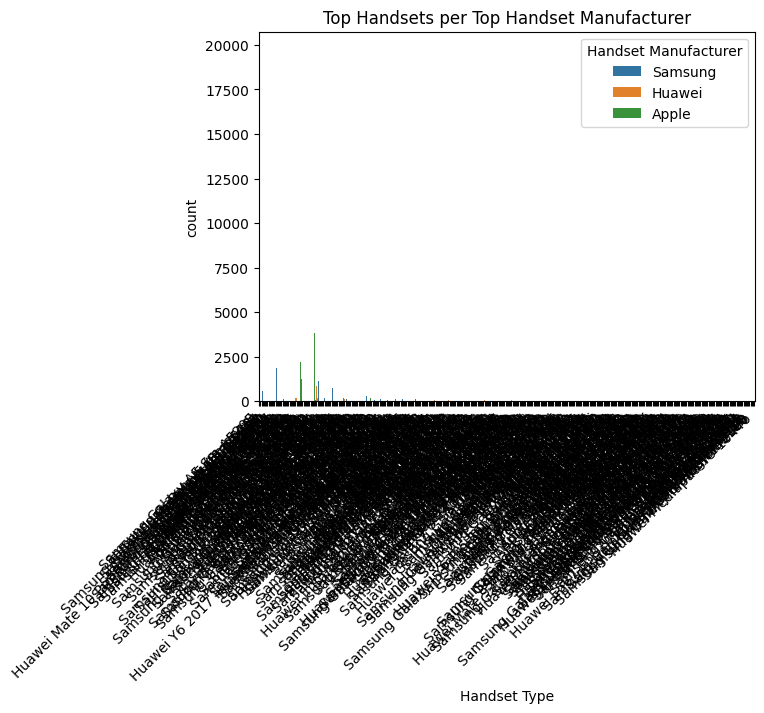

In [105]:
top_manufacturers = df['Handset Manufacturer'].value_counts().head(3).index
top_handsets_per_manufacturer = df[df['Handset Manufacturer'].isin(top_manufacturers)]

sns.countplot(x='Handset Type', hue='Handset Manufacturer', data=top_handsets_per_manufacturer)
plt.xticks(rotation=45, ha='right')
plt.title('Top Handsets per Top Handset Manufacturer')
plt.show()


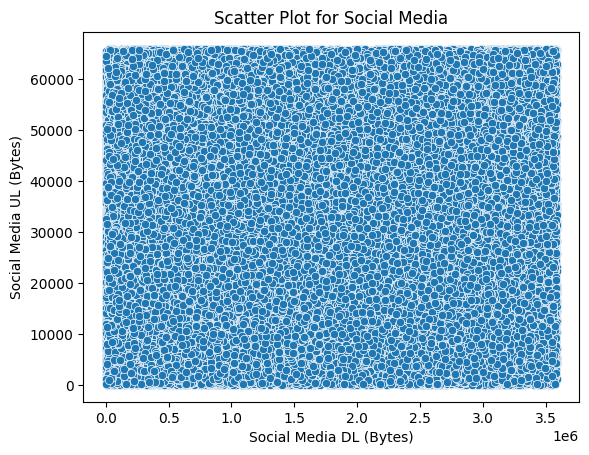

In [106]:

# Scatter plot for Social Media
sns.scatterplot(x='Social Media DL (Bytes)', y='Social Media UL (Bytes)', data=df)
plt.title('Scatter Plot for Social Media')
plt.xlabel('Social Media DL (Bytes)')
plt.ylabel('Social Media UL (Bytes)')
plt.show()


In [107]:
correlation_social_media = df['Social Media DL (Bytes)'].corr(df['Social Media UL (Bytes)'])
print(f"Correlation for Social Media: {correlation_social_media}")


Correlation for Social Media: -0.0005552550605628147


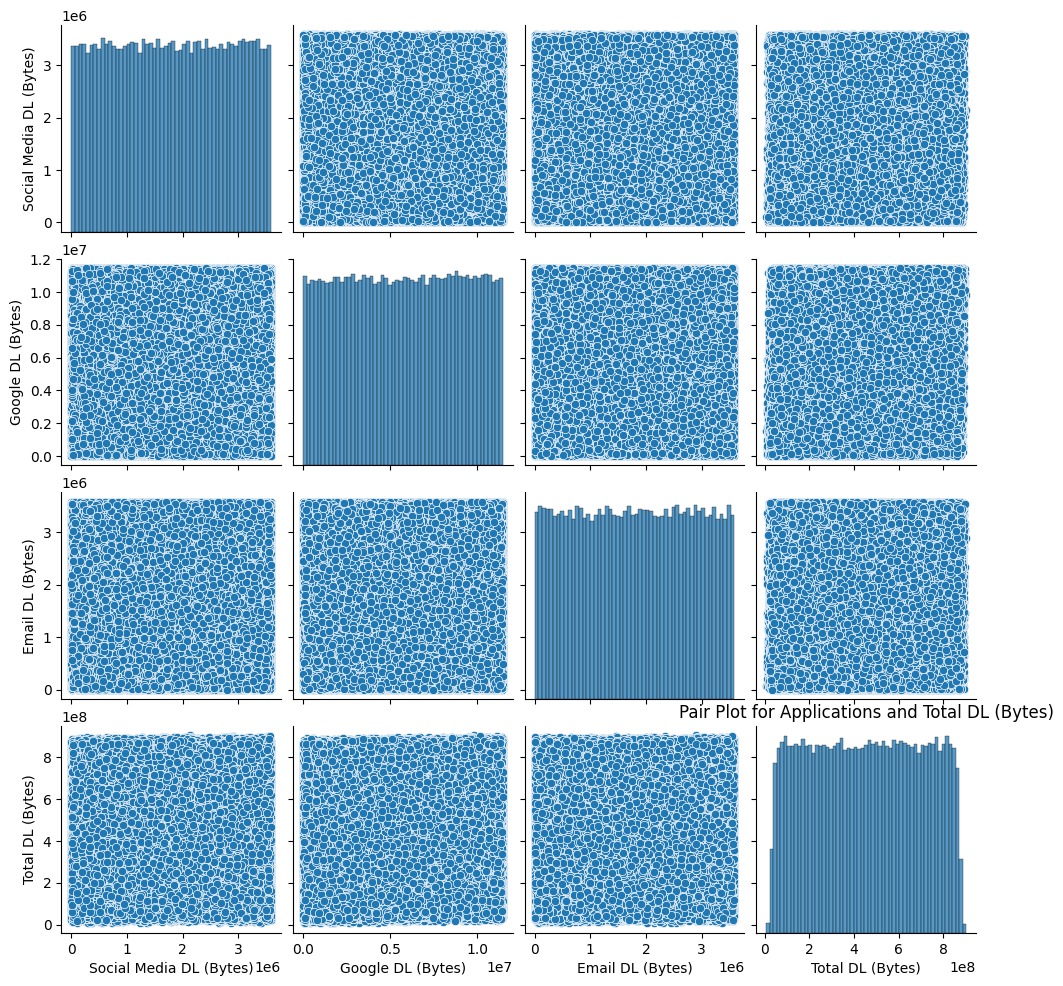

In [108]:
sns.pairplot(df[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Total DL (Bytes)']])
plt.title('Pair Plot for Applications and Total DL (Bytes)')
plt.show()


In [116]:
#Variable transformations

# Calculate total duration per user
total_duration_per_user = df.groupby('MSISDN/Number')['Dur. (ms)'].sum().reset_index()

# Calculate deciles based on total duration
total_duration_per_user['duration_decile'] = pd.qcut(total_duration_per_user['Dur. (ms)'], q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=False, duplicates='drop')

# Calculate total data (DL+UL) per user
total_data_per_user = df.groupby('MSISDN/Number')[['Total UL (Bytes)', 'Total DL (Bytes)']].sum().reset_index()

# Merge the two DataFrames on 'MSISDN/Number'
merged_df = pd.merge(total_duration_per_user, total_data_per_user, on='MSISDN/Number')

# Calculate total data (DL+UL) per decile class
total_data_per_decile = merged_df.groupby('duration_decile')[['Total UL (Bytes)', 'Total DL (Bytes)']].sum().reset_index()

# Display the result
print(total_data_per_decile)


   duration_decile  Total UL (Bytes)  Total DL (Bytes)
0                0      954742960658    10593944089174
1                1     1044427958832    11526214555358
2                2      960517754099    10609465205111
3                3     1157958373734    12816753681013
4                4     2050575017699    22650591624619


In [118]:
# Correlation Analysis

# Create a subset DataFrame with the specified variables
subset_df = df[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']]

# Compute the correlation matrix
correlation_matrix = subset_df.corr()

# Display the correlation matrix
print(correlation_matrix)


                         Social Media DL (Bytes)  Google DL (Bytes)  \
Social Media DL (Bytes)                 1.000000          -0.001954   
Google DL (Bytes)                      -0.001954           1.000000   
Email DL (Bytes)                        0.004745          -0.000039   
Youtube DL (Bytes)                     -0.001389           0.001760   
Netflix DL (Bytes)                     -0.001817           0.000548   
Gaming DL (Bytes)                       0.001018          -0.001421   
Other DL (Bytes)                        0.006126          -0.002557   

                         Email DL (Bytes)  Youtube DL (Bytes)  \
Social Media DL (Bytes)          0.004745           -0.001389   
Google DL (Bytes)               -0.000039            0.001760   
Email DL (Bytes)                 1.000000            0.001679   
Youtube DL (Bytes)               0.001679            1.000000   
Netflix DL (Bytes)               0.001351            0.001202   
Gaming DL (Bytes)                0.000050

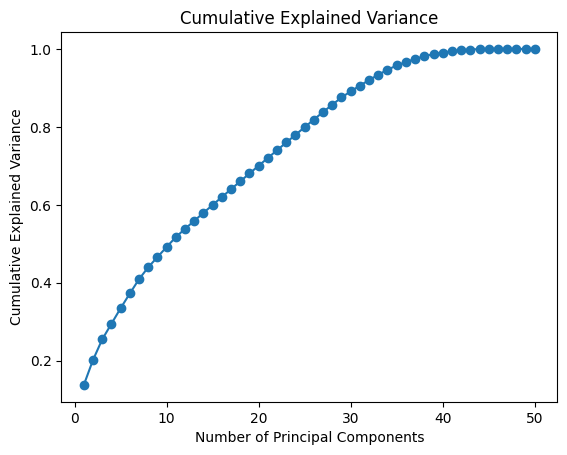

Principal Component Loadings:
       Bearer Id      Start ms        End ms     Dur. (ms)          IMSI  \
0  -4.641110e-02  1.395822e-03  5.480058e-04  5.114954e-02  1.354303e-04   
1   2.139538e-02 -2.325630e-03 -2.554839e-03 -9.467689e-03 -3.549815e-03   
2  -7.946149e-02 -2.790221e-03 -7.852932e-03  2.798528e-01 -2.297560e-03   
3   6.899276e-03  7.852526e-03  1.077491e-02  6.525595e-03  2.133120e-04   
4  -1.258499e-02  9.020338e-03  6.225308e-03 -6.142393e-03  6.864455e-03   
5  -4.717270e-02  5.189577e-03 -2.297952e-03  6.292941e-01  2.573977e-02   
6  -3.605391e-02 -7.043387e-03 -8.793008e-03  6.559776e-02  7.165941e-04   
7   1.446673e-02  7.432961e-03 -1.293328e-03 -3.928017e-03 -9.660562e-03   
8  -8.279101e-02 -5.746736e-02 -5.226813e-02  4.781574e-02 -2.506908e-02   
9   3.215813e-02 -6.971138e-01 -6.977620e-01  1.482366e-03  1.285594e-02   
10  8.409892e-02  9.529165e-02  9.270774e-02  3.794538e-02  1.913852e-02   
11 -6.835095e-01 -1.899207e-02 -6.646905e-03 -1.042516e-01

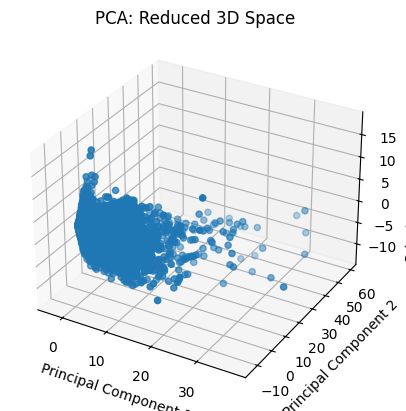

In [122]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Drop any rows with missing values for simplicity
df.dropna(inplace=True)

# Identify and drop non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
df_numeric = df.drop(non_numeric_columns, axis=1)

# Separate features and target variable if applicable
# X = df_numeric.drop('target_variable', axis=1)  # Uncomment and replace 'target_variable' if applicable

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(df_numeric)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plot the explained variance
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Choose the number of components based on the plot or a desired threshold (e.g., 95% variance)
num_components = 3  # Adjust as needed

# Retain the selected number of components
X_pca_selected = X_pca[:, :num_components]

# Interpretation of principal components
principal_components_df = pd.DataFrame(pca.components_, columns=df_numeric.columns)
print("Principal Component Loadings:")
print(principal_components_df)

# Real-world interpretation of principal components
# Add your interpretation based on the loadings and context

# Visualize in the reduced-dimensional space (for 2D or 3D)
if num_components == 2:
    plt.scatter(X_pca_selected[:, 0], X_pca_selected[:, 1], marker='o')
    plt.title('PCA: Reduced 2D Space')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()
elif num_components == 3:
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_pca_selected[:, 0], X_pca_selected[:, 1], X_pca_selected[:, 2], marker='o')
    ax.set_title('PCA: Reduced 3D Space')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    plt.show()


In [125]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [127]:
total_data_per_decile

,duration_decile,Total UL (Bytes),Total DL (Bytes)
0,0,954742960658,10593944089174
1,1,1044427958832,11526214555358
2,2,960517754099,10609465205111
3,3,1157958373734,12816753681013
4,4,2050575017699,22650591624619
